### Part 1:

In [1]:
import requests

In [3]:
import pandas as pd

In [4]:
data_1 = pd.read_csv('data_otgruz.csv')

In [27]:
data_1.iloc[0,0]

'ООО ХОЛСИМ (РУС)'

In [102]:
for i in [0]:
    r = requests.post(f'https://www.beton.ru/graphs/mt_GetData.php?material=cement&type=factory&imporex=null',json={
    'material': 'cement',
    'type': 'factory',
    'imporex': 'null'
    }, data= {'obj':data_1.iloc[i,0]})
    # r.text.encode(encoding='UTF-8',errors='strict')
    a = eval(r.text.encode(encoding='UTF-8',errors='strict'))
    a

# data_1.iloc[i,0]

In [103]:
df_otgr = pd.DataFrame(a) 
ind = df_otgr.index
df_otgr.index = [int(i[1:])+1 for i in ind]
df_otgr = df_otgr.unstack()
df_otgr = df_otgr.sort_index()
df_otgr.index = [str(i[0])+'/'+str(i[1]) for i in list(zip(np.array(df_otgr.index.get_level_values(level=0),dtype='int'),np.array(df_otgr.index.get_level_values(level=1))))]
df_otgr = pd.DataFrame(pd.to_numeric(df_otgr))
df_otgr.columns = [data_1.iloc[0,0]]

In [104]:
df_otgr_all = df_otgr

In [106]:
# df_otgr_all

In [117]:
shit = []
for i in range(2,data_1.shape[0]):
    try:
        r = requests.post(f'https://www.beton.ru/graphs/mt_GetData.php?material=cement&type=factory&imporex=null',json={
        'material': 'cement',
        'type': 'factory',
        'imporex': 'null'
        }, data= {'obj':data_1.iloc[i,0]})
        # r.text.encode(encoding='UTF-8',errors='strict')
        a = eval(r.text.encode(encoding='UTF-8',errors='strict'))


        df_otgr = pd.DataFrame(a) 
        ind = df_otgr.index
        df_otgr.index = [int(i[1:])+1 for i in ind]
        df_otgr = df_otgr.unstack()
        df_otgr = df_otgr.sort_index()
        df_otgr.index = [str(i[0])+'/'+str(i[1]) for i in list(zip(np.array(df_otgr.index.get_level_values(level=0),dtype='int'),np.array(df_otgr.index.get_level_values(level=1))))]
        df_otgr = pd.DataFrame(pd.to_numeric(df_otgr))
        df_otgr.columns = [data_1.iloc[i,0]]

        df_otgr_all = df_otgr_all.join(df_otgr)
    except:
        shit.append(i)
        print(data_1.iloc[i,0])
    
    
df_otgr_all
# data_1.iloc[i,0]

"ООО АЧИНСКИЙ ЦЕМЕНТ
"ООО ЮЖНО-УРАЛЬСКАЯ ГОРНО-ПЕРЕРАБАТЫВАЮЩАЯ КОМПАНИ
"ООО \"ДЮККЕРХОФФ-СУХОЙ ЛОГ\"
"ООО \"АТАКАЙЦЕМЕНТ\"
"ООО АЗИЯ ЦЕМЕНТ
"ЗАО \"ЖСМ\"
"АО НЕВЬЯНСКИЙ ЦЕМЕНТНИК
"ЗАО \"АПКП \"ПРОМТРАНС\"
"ЗАО ХАЙДЕЛЬБЕРГЦЕМЕНТ ВОЛГА


,ООО ХОЛСИМ (РУС),"ООО \""ЦЕМЕНТНАЯ СЕВЕРНАЯ КОМПАНИЯ\""","ООО \""ЦЕМЕНТ\""",ООО СТАРОЦЕМЕНТНЫЙ ЗАВОД,ООО ТОПКИНСКИЙ ЦЕМЕНТ,ООО ДЮККЕРХОФФ КОРКИНО ЦЕМЕНТ,ООО СЕРЕБРЯНСКИЙ ЦЕМЕНТНЫЙ ЗАВОД,ООО ТИМЛЮЙСКИЙ ЦЕМЕНТНЫЙ ЗАВОД,ООО ЦЕМЕНТНЫЕ ТЕХНОЛОГИИ,ООО КРАСНОЯРСКИЙ ЦЕМЕНТ,...,АО МИХАЙЛОВЦЕМЕНТ,АО КАВКАЗЦЕМЕНТ,ЗАО ПИКАЛЁВСКАЯ СОДА,ОАО ПАШИЙСКИЙ МЕТАЛЛУРГИЧЕСКО-ЦЕМЕНТНЫЙ ЗАВОД (О,ОАО НОВОРОСЦЕМЕНТ,ОАО ИСКИТИМЦЕМЕНТ,ОАО ХОЛСИМ (РУС) СМ,ОАО ВЕРХНЕБАКАНСКИЙ ЦЕМЕНТНЫЙ ЗАВОД,ОАО МЦОЗ,"ЗАО \""МЕТАХИМ\"""
2008/1,126519.0,NaN,NaN,NaN,103968.0,66312.0,NaN,18013.0,1084.0,32724.0,...,52001.0,64948.0,NaN,3347.0,136001.0,55554.0,13676.0,10350.0,7582.0,20249.0
2008/2,139270.0,NaN,NaN,NaN,143297.0,65634.0,NaN,18928.0,1030.0,39177.0,...,54480.0,87973.0,NaN,6349.0,194986.0,72304.0,10626.0,10545.0,10790.0,20316.0
2008/3,164465.0,NaN,NaN,NaN,199811.0,74403.0,NaN,27568.0,1243.0,48990.0,...,70166.0,153855.0,NaN,6368.0,235743.0,89640.0,16595.0,21218.0,8350.0,24469.0
2008/4,174912.0,NaN,NaN,204.0,234412.0,62656.0,NaN,33697.0,768.0,45155.0,...,90382.0,185121.0,NaN,4527.0,246335.0,106726.0,22088.0,11672.0,10042.0,20420.0
2008/5,189683.0,NaN,NaN,1063.0,235209.0,72185.0,NaN,33287.0,530.0,37748.0,...,74725.0,141882.0,NaN,6603.0,248992.0,110025.0,24186.0,19200.0,8244.0,17335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
shit_names = [i[2:] for i in data_1.iloc[shit,0]]

In [128]:
shit2=[]
for i in range(len(shit_names)):
    try:
        r = requests.post(f'https://www.beton.ru/graphs/mt_GetData.php?material=cement&type=factory&imporex=null',json={
        'material': 'cement',
        'type': 'factory',
        'imporex': 'null'
        }, data= {'obj':shit_names[i]})
        # r.text.encode(encoding='UTF-8',errors='strict')
        a = eval(r.text.encode(encoding='UTF-8',errors='strict'))

        df_otgr = pd.DataFrame(a) 
        ind = df_otgr.index
        df_otgr.index = [int(i[1:])+1 for i in ind]
        df_otgr = df_otgr.unstack()
        df_otgr = df_otgr.sort_index()
        df_otgr.index = [str(i[0])+'/'+str(i[1]) for i in list(zip(np.array(df_otgr.index.get_level_values(level=0),dtype='int'),np.array(df_otgr.index.get_level_values(level=1))))]
        df_otgr = pd.DataFrame(pd.to_numeric(df_otgr))
        df_otgr.columns = [shit_names[i]]

        df_otgr_all = df_otgr_all.join(df_otgr)
        
    except:
        shit2.append(i)
        print(shit_names[i])



# data_1.iloc[i,0]

In [130]:
df_otgr_all.to_csv('df_otgr_all.csv')

In [136]:
df_otgr_all.iloc[156:168,:].sum().to_csv('df_zav_all.csv')

In [119]:
# df_otgr_all.plot()

<AxesSubplot:>

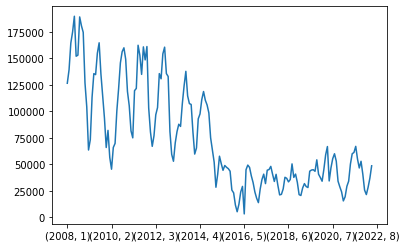

In [74]:
pd.to_numeric().plot()

### Part 2

In [145]:
from bs4 import BeautifulSoup

In [187]:
result = requests.get('https://www.beton.ru/cemzavodi/')

soup = BeautifulSoup(result.text)

list_zav = [i.find('a').get('href') for i in soup.find_all("td", {'class':'action_text'})]

In [188]:
list_zav

['/cemzavodi/element.php?ID=356996',
 '/cemzavodi/element.php?ID=357002',
 '/cemzavodi/element.php?ID=356990',
 '/cemzavodi/element.php?ID=357034',
 '/cemzavodi/element.php?ID=356948',
 '/cemzavodi/element.php?ID=357024',
 '/cemzavodi/element.php?ID=357050',
 '/cemzavodi/element.php?ID=357040',
 '/cemzavodi/element.php?ID=357062',
 '/cemzavodi/element.php?ID=357032',
 '/cemzavodi/element.php?ID=357014',
 '/cemzavodi/element.php?ID=356956',
 '/cemzavodi/element.php?ID=355808',
 '/cemzavodi/element.php?ID=356967',
 '/cemzavodi/element.php?ID=357030']

In [189]:
for i in range(2,6):
    result = requests.get('https://www.beton.ru/cemzavodi/?PAGEN_1='+str(i))
    soup = BeautifulSoup(result.text)
    [list_zav.append(i.find('a').get('href')) for i in soup.find_all("td", {'class':'action_text'})]

In [196]:
list_zav = ['https://www.beton.ru'+i for i in list_zav]

In [298]:
result = requests.get(list_zav[0])
soup = BeautifulSoup(result.text)

name = soup.find_all("h1", {'class':'title'})[0].text
s = soup.find_all("td", {'class':'tableinfo'})[0]
tab1 = pd.read_html(str(s))[0]
tab1 = tab1.dropna()
tab1.index=tab1.iloc[:,0]
tab1 = tab1.drop(0,axis=1)
tab1 = tab1.T
tab1.index = [name]
# tab1 

s = soup.find_all("td", {'class':'tableinfo'})[1]
tab2 = pd.read_html(str(s))[0]
arr2 = tab2[0]+tab2[1]
tab1['Номенклатура'] = ['; '.join(list(arr2))]
# tab1

s = soup.find_all("td", {'width':'150'})[0]
tab3 = pd.read_html(str(s))[0]
# tab3.index

tab3.index=tab3.iloc[:,0]
tab3 = tab3.drop(0,axis=1)
tab3 = tab3.T
tab3.index = [name]

tab1 = tab1.join(tab3)
# tab1

In [300]:
zav_names_all = tab1.copy()

In [302]:
# zav_names_all.append(zav_names_all)

In [312]:
shit3=[]
for i in range(1,len(list_zav)):
# for i in [1]:

    try:
        result = requests.get(list_zav[i])
        soup = BeautifulSoup(result.text)

        name = soup.find_all("h1", {'class':'title'})[0].text
        s = soup.find_all("td", {'class':'tableinfo'})[0]
        tab1 = pd.read_html(str(s))[0]
        tab1 = tab1.dropna()
        tab1.index=tab1.iloc[:,0]
        tab1 = tab1.drop(0,axis=1)
        tab1 = tab1.T
        tab1.index = [name]
        # tab1 

        s = soup.find_all("td", {'class':'tableinfo'})[1]
        tab2 = pd.read_html(str(s))[0]
        arr2 = tab2[0]+tab2[1]
        tab1['Номенклатура'] = ['; '.join(list(arr2))]
        # tab1

        s = soup.find_all("td", {'width':'150'})[0]
        tab3 = pd.read_html(str(s))[0]
        # tab3.index

        tab3.index=tab3.iloc[:,0]
        tab3 = tab3.drop(0,axis=1)
        tab3 = tab3.T
        tab3.index = [name]

        tab1 = tab1.join(tab3)
        
        zav_names_all = pd.concat([zav_names_all,tab1])

        
    except:
        shit3.append(i)
        print(name)

    # tab1

АО "Чеченцемент"
ОАО "Камчатцемент"
ХайдельбергЦемент Криворожский завод (Украина)
ХайдельбергЦемент Амвросиевский завод (УКРАИНА)
ХайдельбергЦемент Днепродзержинский завод (Украина)


In [314]:
# zav_names_all
shit3

[33, 45, 57, 60, 61]

In [320]:
shit4=[]
for i in shit3:
# for i in [1]:

    try:
        result = requests.get(list_zav[i])
        soup = BeautifulSoup(result.text)

        name = soup.find_all("h1", {'class':'title'})[0].text
        s = soup.find_all("td", {'class':'tableinfo'})[0]
        tab1 = pd.read_html(str(s))[0]
        tab1 = tab1.dropna()
        tab1.index=tab1.iloc[:,0]
        tab1 = tab1.drop(0,axis=1)
        tab1 = tab1.T
        tab1.index = [name]
        # tab1 


        
        s = soup.find_all("td", {'width':'150'})[0]
        tab3 = pd.read_html(str(s))[0]
        # tab3.index

        tab3.index=tab3.iloc[:,0]
        tab3 = tab3.drop(0,axis=1)
        tab3 = tab3.T
        tab3.index = [name]

        tab1 = tab1.join(tab3)
        
        zav_names_all = pd.concat([zav_names_all,tab1])

        
    except:
        shit4.append(i)
        print(name)

    # tab1


In [321]:
zav_names_all.to_csv('zav_names_all.csv')

In [326]:
# !pip install Levenshtein


In [325]:
from levenpandas import fuzzymerge

In [345]:
df1 = pd.read_csv('zav_names_all.csv')
df2 = pd.read_csv('df_zav_all.csv')

In [340]:
# df2

In [347]:
# merged = 
fuzzymerge(df1, df2, left_on='name', right_on='name2').to_csv('check.csv')


In [353]:
df1 = pd.read_csv('spark2021.csv')
df2 = pd.read_csv('renamed.csv')
# df2

In [354]:
# merged = 
fuzzymerge(df2, df1, left_on='name', right_on='name1').to_csv('check2.csv')


### Part 3

In [358]:
import requests

import pandas as pd

data_1 = pd.read_csv('subj_names.csv')

data_1.iloc[0,0]

'АЛТАЙСКИЙ КРАЙ'

In [363]:
for i in [0]:
    r = requests.post(f'https://www.beton.ru/graphs/mt_GetData.php?material=cement&type=city&imporex=null',json={
    'material': 'cement',
    'type': 'city',
    'imporex': 'null'
    }, data= {'obj':data_1.iloc[i,0]})
    # r.text.encode(encoding='UTF-8',errors='strict')
    a = eval(r.text.encode(encoding='UTF-8',errors='strict'))
a


{'2013': {'00': '17661',
  '01': '26672',
  '02': '36809',
  '03': '56899',
  '04': '79269',
  '05': '90400',
  '06': '98776',
  '07': '80505',
  '08': '77603',
  '09': '51937',
  '010': '41576',
  '011': '30380'},
 '2012': {'00': '17628',
  '01': '27926',
  '02': '32270',
  '03': '51171',
  '04': '80118',
  '05': '93112',
  '06': '97581',
  '07': '79561',
  '08': '77008',
  '09': '63898',
  '010': '31802',
  '011': '17619'},
 '2010': {'00': '13257',
  '01': '16084',
  '02': '23674',
  '03': '32655',
  '04': '49341',
  '05': '68955',
  '06': '68132',
  '07': '61809',
  '08': '59859',
  '09': '55643',
  '010': '27292',
  '011': '20715'},
 '2011': {'00': '20972',
  '01': '23751',
  '02': '32681',
  '03': '50970',
  '04': '71445',
  '05': '76470',
  '06': '82609',
  '07': '74458',
  '08': '70557',
  '09': '69496',
  '010': '31178',
  '011': '20099'},
 '2009': {'00': '9081',
  '01': '13018',
  '02': '22985',
  '03': '36741',
  '04': '38998',
  '05': '74860',
  '06': '120653',
  '07': '7951

In [368]:
# data_1.iloc[i,0]

df_otgr = pd.DataFrame(a) 
ind = df_otgr.index
df_otgr.index = [int(i[1:])+1 for i in ind]
df_otgr = df_otgr.unstack()
df_otgr = df_otgr.sort_index()
df_otgr.index = [str(i[0])+'/'+str(i[1]) for i in list(zip(np.array(df_otgr.index.get_level_values(level=0),dtype='int'),np.array(df_otgr.index.get_level_values(level=1))))]
df_otgr = pd.DataFrame(pd.to_numeric(df_otgr))
df_otgr.columns = [data_1.iloc[0,0]]

df_otgr_all = df_otgr

# df_otgr_all

In [369]:
shit = []
for i in range(2,data_1.shape[0]):
    try:
        r = requests.post(f'https://www.beton.ru/graphs/mt_GetData.php?material=cement&type=city&imporex=null',json={
        'material': 'cement',
        'type': 'city',
        'imporex': 'null'
        }, data= {'obj':data_1.iloc[i,0]})

        # r.text.encode(encoding='UTF-8',errors='strict')
        a = eval(r.text.encode(encoding='UTF-8',errors='strict'))


        df_otgr = pd.DataFrame(a) 
        ind = df_otgr.index
        df_otgr.index = [int(i[1:])+1 for i in ind]
        df_otgr = df_otgr.unstack()
        df_otgr = df_otgr.sort_index()
        df_otgr.index = [str(i[0])+'/'+str(i[1]) for i in list(zip(np.array(df_otgr.index.get_level_values(level=0),dtype='int'),np.array(df_otgr.index.get_level_values(level=1))))]
        df_otgr = pd.DataFrame(pd.to_numeric(df_otgr))
        df_otgr.columns = [data_1.iloc[i,0]]

        df_otgr_all = df_otgr_all.join(df_otgr)
    except:
        shit.append(i)
        print(data_1.iloc[i,0])
    
    
df_otgr_all
# data_1.iloc[i,0]

,АЛТАЙСКИЙ КРАЙ,АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,АСТРАХАНСКАЯ ОБЛАСТЬ,БЕЛГОРОДСКАЯ ОБЛАСТЬ,БРЯНСКАЯ ОБЛАСТЬ,ВЛАДИМИРСКАЯ ОБЛАСТЬ,ВОЛГОГРАДСКАЯ ОБЛАСТЬ,ВОЛОГОДСКАЯ ОБЛАСТЬ,ВОРОНЕЖСКАЯ ОБЛАСТЬ,ГОРОД МОСКВА,...,ТЮМЕНСКАЯ ОБЛАСТЬ,УДМУРТСКАЯ РЕСПУБЛИКА,УЛЬЯНОВСКАЯ ОБЛАСТЬ,ХАБАРОВСКИЙ КРАЙ,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕН,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,ЧЕЧЕНСКАЯ РЕСПУБЛИКА,ЧУВАШСКАЯ РЕСПУБЛИКА-ЧАВАШ РЕСПУБЛИКИ,ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕНСК,ЯРОСЛАВСКАЯ ОБЛАСТЬ
2008/1,29284.0,9490.0,20915.0,6312.0,4985.0,13663.0,37011.0,16375.0,28778.0,310992.0,...,44603.0,17193.0,7733.0,14526.0,92652.0,45320.0,23611.0,11571.0,16097.0,20591.0
2008/2,31498.0,8616.0,22584.0,6553.0,8025.0,22416.0,28252.0,23151.0,32917.0,377791.0,...,55167.0,20796.0,7704.0,17273.0,92568.0,53003.0,34068.0,23661.0,18997.0,26440.0
2008/3,49055.0,9927.0,27907.0,9328.0,9364.0,25177.0,41746.0,28127.0,49806.0,424067.0,...,75415.0,25412.0,8718.0,20557.0,100342.0,59565.0,59097.0,20697.0,42600.0,35877.0
2008/4,60121.0,12549.0,30559.0,16866.0,12876.0,33240.0,54591.0,31699.0,51015.0,551099.0,...,83439.0,53220.0,12691.0,27861.0,86328.0,69491.0,62331.0,23252.0,33816.0,37877.0
2008/5,59149.0,16838.0,32369.0,16769.0,10135.0,32554.0,51200.0,37623.0,39381.0,527313.0,...,86731.0,35137.0,9812.0,31543.0,111049.0,66967.0,34596.0,23519.0,30807.0,42435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
r = requests.post(f'https://www.beton.ru/graphs/mt_GetData.php?material=cement&type=city&imporex=null',json={
'material': 'cement',
'type': 'city',
'imporex': 'null'
}, data= {'obj':'МОСКВА'})

# r.text.encode(encoding='UTF-8',errors='strict')
a = eval(r.text.encode(encoding='UTF-8',errors='strict'))
df_otgr = pd.DataFrame(a) 
ind = df_otgr.index
df_otgr.index = [int(i[1:])+1 for i in ind]
df_otgr = df_otgr.unstack()
df_otgr = df_otgr.sort_index()
df_otgr.index = [str(i[0])+'/'+str(i[1]) for i in list(zip(np.array(df_otgr.index.get_level_values(level=0),dtype='int'),np.array(df_otgr.index.get_level_values(level=1))))]
df_otgr = pd.DataFrame(pd.to_numeric(df_otgr))
df_otgr.columns = ['МОСКВА']

df_otgr_all = df_otgr_all.join(df_otgr)

In [374]:
df_otgr_all

,АЛТАЙСКИЙ КРАЙ,АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,АСТРАХАНСКАЯ ОБЛАСТЬ,БЕЛГОРОДСКАЯ ОБЛАСТЬ,БРЯНСКАЯ ОБЛАСТЬ,ВЛАДИМИРСКАЯ ОБЛАСТЬ,ВОЛГОГРАДСКАЯ ОБЛАСТЬ,ВОЛОГОДСКАЯ ОБЛАСТЬ,ВОРОНЕЖСКАЯ ОБЛАСТЬ,ГОРОД МОСКВА,...,УДМУРТСКАЯ РЕСПУБЛИКА,УЛЬЯНОВСКАЯ ОБЛАСТЬ,ХАБАРОВСКИЙ КРАЙ,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕН,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,ЧЕЧЕНСКАЯ РЕСПУБЛИКА,ЧУВАШСКАЯ РЕСПУБЛИКА-ЧАВАШ РЕСПУБЛИКИ,ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕНСК,ЯРОСЛАВСКАЯ ОБЛАСТЬ,МОСКВА
2008/1,29284.0,9490.0,20915.0,6312.0,4985.0,13663.0,37011.0,16375.0,28778.0,310992.0,...,17193.0,7733.0,14526.0,92652.0,45320.0,23611.0,11571.0,16097.0,20591.0,310992.0
2008/2,31498.0,8616.0,22584.0,6553.0,8025.0,22416.0,28252.0,23151.0,32917.0,377791.0,...,20796.0,7704.0,17273.0,92568.0,53003.0,34068.0,23661.0,18997.0,26440.0,377791.0
2008/3,49055.0,9927.0,27907.0,9328.0,9364.0,25177.0,41746.0,28127.0,49806.0,424067.0,...,25412.0,8718.0,20557.0,100342.0,59565.0,59097.0,20697.0,42600.0,35877.0,424067.0
2008/4,60121.0,12549.0,30559.0,16866.0,12876.0,33240.0,54591.0,31699.0,51015.0,551099.0,...,53220.0,12691.0,27861.0,86328.0,69491.0,62331.0,23252.0,33816.0,37877.0,551099.0
2008/5,59149.0,16838.0,32369.0,16769.0,10135.0,32554.0,51200.0,37623.0,39381.0,527313.0,...,35137.0,9812.0,31543.0,111049.0,66967.0,34596.0,23519.0,30807.0,42435.0,527313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [375]:
df_otgr_all.to_csv('regions_cons.csv')